# Practical 5: Measuring relationships

This week is focused on measuring the relationship between two variables
using Pearson/Spearman correlation coefficients.

In the practical, we’re going to explore the correlation between
different variables in the school dataset.

In [2]:
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import pearsonr, spearmanr

import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Dataset

We’re going to use a piece of filtered school data that is kindly
provided by Adam. In W6, Adam will describe the source and processing of
this dataset in details. For now, we just use this dataset as is.

In [3]:
# read in the dataset from Github
df_school = pd.read_csv("https://raw.githubusercontent.com/huanfachen/QM/refs/heads/main/sessions/L6_data/Performancetables_130242/2022-2023/england_filtered.csv")

Check the shape and columns of this data frame.

In [4]:
print(f"df_school has {df_school.shape[0]} rows and {df_school.shape[1]} columns.")
print("First 5 rows:\n")
print(df_school.head(5))

df_school has 3056 rows and 37 columns.
First 5 rows:

      URN                                  SCHNAME.x  LEA  LANAME  TOWN.x  \
0  100053                     Acland Burghley School  202  Camden  London   
1  100054                The Camden School for Girls  202  Camden  London   
2  100052                           Hampstead School  202  Camden  London   
3  100049                          Haverstock School  202  Camden  London   
4  100059  La Sainte Union Catholic Secondary School  202  Camden  London   

  gor_name  TOTPUPS  ATT8SCR  ATT8SCRENG  ATT8SCRMAT  ATT8SCR_FSM6CLA1A  \
0   London   1163.0     50.3        10.7        10.2               34.8   
1   London   1047.0     65.8        13.5        12.7               54.7   
2   London   1319.0     44.6         9.7         9.1               39.3   
3   London    982.0     41.7         8.7         8.8               37.7   
4   London    817.0     49.6        10.8         9.4               45.9   

   ATT8SCR_NFSM6CLA1A  ATT8SCR_

The metadata of this data is available
[here](https://github.com/huanfachen/QM/blob/main/sessions/L6_data/Performancetables_130249/2022-2023/census_meta.csv).
For convenience, the columns are described as below:  
1. **URN**: Unique Reference Number identifying a school.  
2. **SCHNAME.x**: School name as recorded in the official register.  
3. **LEA**: Local Education Authority (code).  
4. **LANAME**: Name of the Local Authority.  
5. **TOWN.x**: Town in which the school is located.  
6. **gor_name**: Government Office Region name.  
7. **TOTPUPS**: Total number of pupils on roll.  
8. **ATT8SCR**: Average Attainment 8 score for all pupils.  
9. **ATT8SCRENG**: Average Attainment 8 score for English subject
grouping.  
10. **ATT8SCRMAT**: Average Attainment 8 score for Maths subject
grouping.  
11. **ATT8SCR_FSM6CLA1A**: Average Attainment 8 score for pupils
eligible for Free School Meals in the last 6 years and/or Children
Looked After.  
12. **ATT8SCR_NFSM6CLA1A**: Average Attainment 8 score for pupils not
eligible for Free School Meals in the last 6 years and not Children
Looked After.  
13. **ATT8SCR_BOYS**: Average Attainment 8 score for male pupils.  
14. **ATT8SCR_GIRLS**: Average Attainment 8 score for female pupils.  
15. **P8MEA**: Progress 8 measure for all pupils.  
16. **P8MEA_FSM6CLA1A**: Progress 8 measure for disadvantaged pupils
(FSM6 and/or CLA1A).  
17. **P8MEA_NFSM6CLA1A**: Progress 8 measure for non-disadvantaged
pupils.  
18. **PTFSM6CLA1A**: Percentage of pupils eligible for FSM6 and/or
CLA1A.  
19. **PTNOTFSM6CLA1A**: Percentage of pupils not eligible for FSM6
and/or CLA1A.  
20. **PNUMEAL**: Percentage of pupils whose first language is known or
believed to be other than English.  
21. **PNUMENGFL**: Percentage of pupils whose first language is
English.  
22. **PTPRIORLO**: Percentage of pupils with low prior attainment from
Key Stage 2.  
23. **PTPRIORHI**: Percentage of pupils with high prior attainment from
Key Stage 2.  
24. **NORB**: Number of boys on roll.  
25. **NORG**: Number of girls on roll.  
26. **PNUMFSMEVER**: Percentage of pupils who have been eligible for
free school meals in the past six years (FSM6 measure).  
27. **PERCTOT**: Percentage of total pupil absence (authorised and
unauthorised combined).  
28. **PPERSABS10**: Percentage of pupils who are persistently absent
(overall absence rate 10% or more).  
29. **SCHOOLTYPE.x**: Official classification of the school type (e.g.,
Academy, Community, Voluntary Aided).  
30. **RELCHAR**: Religious character of the school (e.g., Church of
England, Roman Catholic, None).  
31. **ADMPOL.y**: Admission policy type (e.g., non-selective,
selective).  
32. **ADMPOL_PT**: Percentage breakdown related to admission policy
(context-specific).  
33. **gender_name**: Gender intake of the school (Mixed, Boys, Girls).  
34. **OFSTEDRATING**: Latest Ofsted inspection overall effectiveness
grade.  
35. **MINORGROUP**: Ethnic minority group classification for aggregation
purposes.  
36. **easting**: Ordnance Survey Easting coordinate of school
location.  
37. **northing**: Ordnance Survey Northing coordinate of school
location.

To demonstrate, we will focus on 6 columns of this dataset. 1.
**LANAME**: local authority name 2. **SCHNAME.x**: school name 3.
**ATT8SCR**: Average Attainment 8 score per pupil (0-100) 4.
**PERCTOT**: Percentage of total absence 5. **PTFSM6CLA1A**: Percentage
of pupils eligible for FSM6 (free school meals at any point in the last
six years) and/or CLA1A (proxy for socio-economic disadvantage). CLA1A
stands for *Children Looked After (for at least one day)*, which
identifies pupils who have been in the care of a local authority. 6.
**PNUMEAL**: Percentage of pupils whose first language is known or
believed to be other than English.

In [5]:
# Extract the selected columns
df_school_reduced = df_school[['LANAME', 'SCHNAME.x', 'ATT8SCR', 'PERCTOT', 'PTFSM6CLA1A', 'PNUMEAL']]

# Display the first few rows
print(df_school_reduced.head())

   LANAME                                  SCHNAME.x  ATT8SCR  PERCTOT  \
0  Camden                     Acland Burghley School     50.3      8.1   
1  Camden                The Camden School for Girls     65.8      4.5   
2  Camden                           Hampstead School     44.6      8.2   
3  Camden                          Haverstock School     41.7     10.1   
4  Camden  La Sainte Union Catholic Secondary School     49.6     10.3   

   PTFSM6CLA1A  PNUMEAL  
0         37.0     23.6  
1         36.0     25.5  
2         45.0     38.1  
3         63.0     57.5  
4         41.0     50.6  


## First question: is overall absence related to average attainment 8 score?

We will start with investigating the relationship between percentage of
overall absence and attainment 8 score. The very first step is to make a
scatterplot:

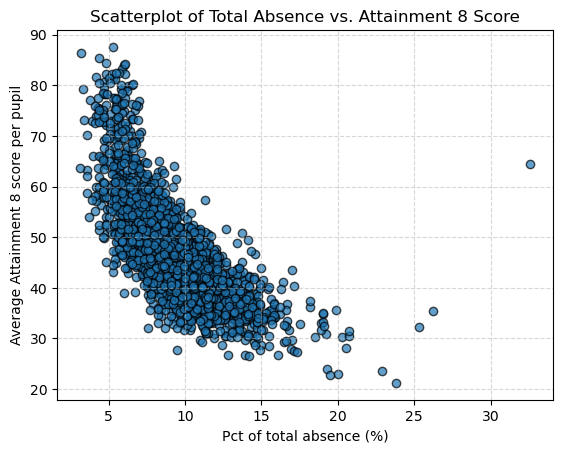

In [6]:
# Scatterplot between PERCTOT and ATT8SCR
plt.scatter(df_school_reduced['PERCTOT'], df_school_reduced['ATT8SCR'], alpha=0.7, edgecolor='k')

# Axis labels
plt.xlabel('Pct of total absence (%)')
plt.ylabel('Average Attainment 8 score per pupil')

# Title
plt.title('Scatterplot of Total Absence vs. Attainment 8 Score')

# Optional: grid
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

The plot shows a decreasing trend: the higher total absence, the lower
average attainment.

The records with PERCTOT greater than 25% look like outliers, which are
printed as below:

In [7]:
# Filter rows where PERCTOT > 25
filtered_rows = df_school_reduced[df_school_reduced['PERCTOT'] > 25]

print("Schools with %total_absence > 25:")
print(filtered_rows)

Schools with %total_absence > 25:
        LANAME                           SCHNAME.x  ATT8SCR  PERCTOT  \
616    Walsall               Walsall Studio School     35.5     26.2   
976   Bradford                      Hanson Academy     32.2     25.3   
2207      Kent  Mayfield Grammar School, Gravesend     64.4     32.6   

      PTFSM6CLA1A  PNUMEAL  
616          42.0      3.2  
976          46.0     30.3  
2207         10.0     24.5  


For now, we are keeping these records because there is no evidence to
confirm they are outliers

As both variables are continous, we can use **Pearson correlation** to
measure if they follow a linear relationship. we’ll use the **pearsonr**
function the scipy.stats package, as this fucntion calculates the
correlation coefficient and p values in one line.

In [8]:
# Calculate Pearson correlation
corr_coef, p_value = pearsonr(df_school_reduced['PERCTOT'], df_school_reduced['ATT8SCR'])

print("Pearson correlation coefficient:", corr_coef)
print("Two-tailed p-value:", p_value)

Pearson correlation coefficient: nan
Two-tailed p-value: nan


Wait. We got an ERROR -
`ValueError: array must not contain infs or NaNs`. Remember that we
discussed *NA* or *NaN* values in W1. *You might want to remove the
above code cell from the notebook, since it doesn’t run.*

Unfortunately, the *pearsonr* function doesn’t handle NaNs internally.
We would have to handle NaNs before computing.

The logic would be: 1. Retain the rows with no NaN in *PERCTOT* and
*ATT8SCR*:
`~np.isnan(df_school_reduced['PERCTOT']) & ~np.isnan(df_school_reduced['ATT8SCR'])`
returns a list of **mask**, which is *True* when no NaN values are in
*PERCTOT* and *ATT8SCR*. 2. Calculate the Pearson correlation between
*PERCTOT* and *ATT8SCR* in these rows.

In [9]:
# Drop rows with NaNs in either column
mask = ~np.isnan(df_school_reduced['PERCTOT']) & ~np.isnan(df_school_reduced['ATT8SCR'])

print(f"#all records: {df_school_reduced.shape[0]}")
print(f"#records with no NaN in both PERCTOT and ATT8SCR: {len(mask[mask==True])}")

x = df_school_reduced.loc[mask, 'PERCTOT']
y = df_school_reduced.loc[mask, 'ATT8SCR']

corr_coef, p_value = pearsonr(x, y)

print(f"Pearson correlation coefficient:{corr_coef:.2f}")
print(f"Two-tailed p-value:{p_value:.2f}")

#all records: 3056
#records with no NaN in both PERCTOT and ATT8SCR: 2969
Pearson correlation coefficient:-0.72
Two-tailed p-value:0.00


The results look good.

-   A Pearson correlation of `-0.72` indicates that *PERCTOT* and
    *ATT8SCR* are negatively correlated, which is aligned with our
    hypothesis.
-   A very small p value (*0.00* meaning it is smaller than 0.01)
    indicates that their correlation is statistically significant at the
    level of 0.05.

## Second attempt: using Spearman correlation

Can we apply Spearman correlation to these two variables? Definitely -
Spearman correlation is applicable to continuous variables.

Following a similar procedure:

In [10]:
# Drop rows with NaNs in either column
mask = ~np.isnan(df_school_reduced['PERCTOT']) & ~np.isnan(df_school_reduced['ATT8SCR'])

print(f"#all records: {df_school_reduced.shape[0]}")
print(f"#records with no NaN in both PERCTOT and ATT8SCR: {len(mask[mask==True])}")

x = df_school_reduced.loc[mask, 'PERCTOT']
y = df_school_reduced.loc[mask, 'ATT8SCR']

corr_coef, p_value = spearmanr(x, y)

print(f"Spearman correlation coefficient:{corr_coef:.2f}")
print(f"Two-tailed p-value:{p_value:.2f}")

#all records: 3056
#records with no NaN in both PERCTOT and ATT8SCR: 2969
Spearman correlation coefficient:-0.77
Two-tailed p-value:0.00


The results are quite similar to Pearson correlation: - Spearman
correlation coefficient of -0.77 indicates a negative correlation
between these two variables. - The p value is smaller than 0.01,
indicating statistical significance.

## Calculating Pearson correlation for all pairs of variables

The df_school_reduced dataframe contains four continous variables, and
there are 6 possible pairs of variables.

Is it possible to compute and visualise the correlation of all pairs in
one line?

The solution is to create and plot a correlation matrix, using *pandas*.

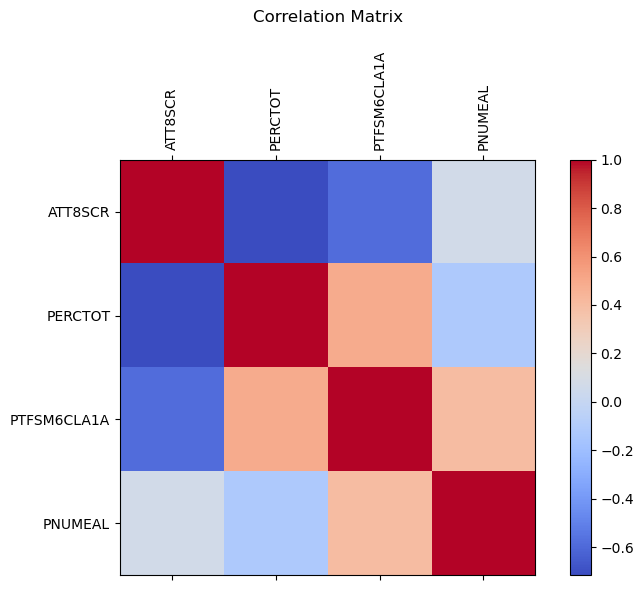

In [13]:
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_school_reduced.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=False)  # fignum=False prevents new fig creation
plt.colorbar()
plt.title('Correlation Matrix', pad=20)

# Add axis tick labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.tight_layout()
plt.show()

The plot shows pairwise correlation between the four continous
variables, as the norminal variabels of *LNAME* and *SCHNAME.x* are
excluded by the setting of `numeric_only=True` in corr().

This matrix or heatmap is symmetric, since the Pearson correlation is
symmetric between the two variables.

The red colour on the diagonal line indicates correlation=1, which is
perfect positive correlation.

So, what does this matrix tell us about the variables’ correlation? -
*Attainment 8 score* negatively correlates with *% overall absence*, *%
disadvantaged pupils*, and *% pupils where English not first
language*. - *% overall absence* positively correlates with *%
disadvantaged pupils* and negatively correlates with *% pupils where
English not first language*. The latter correlation seems to contradict
the results of a study that reports primary school pupils who use EAL
are more likely to be persistently absent for 10% or more of lessons
than pupils who speak English as their first language (see
[link](https://www.bell-foundation.org.uk/app/uploads/2024/07/Addressing-School-Absences-Among-EAL-Pupils_briefing.pdf)).
This needs to be confirmed by more investigation. - *% disadvantaged
pupils* is positively associated with *% pupils where English not first
language*.

Interestingly, in the code above, we didn’t deal with the NaN values.
The reason is that, using `DataFrame.corr()`, Pearson, Kendall, and
Spearman correlation are currently computed using pairwise complete
observations. In other words, this function deals with incomplete
observations internally.

A limitation of the code above is that it doesn’t calculate the p-value
for each correlation. To calculate both correlation coefficients and p
values in a batch, we can use a new package called **pingouin**.

If you want to try out the code below, you would need to install
pingouin using `pip install pingouin` on a terminal or
`!pip install pingouin` in a Python notebook.

In [18]:
# !pip install pingouin
import pingouin as pg

# Calculate correlation matrix with p-values
corr_results = pg.pairwise_corr(df_school_reduced, columns=df_school_reduced.select_dtypes(float).columns, method='pearson')

print(corr_results)

             X            Y   method alternative     n         r  \
0      ATT8SCR      PERCTOT  pearson   two-sided  2969 -0.716090   
1      ATT8SCR  PTFSM6CLA1A  pearson   two-sided  2970 -0.586077   
2      ATT8SCR      PNUMEAL  pearson   two-sided  2970  0.074745   
3      PERCTOT  PTFSM6CLA1A  pearson   two-sided  2969  0.489657   
4      PERCTOT      PNUMEAL  pearson   two-sided  3029 -0.120967   
5  PTFSM6CLA1A      PNUMEAL  pearson   two-sided  2970  0.399959   

            CI95%          p-unc        BF10     power  
0   [-0.73, -0.7]   0.000000e+00         inf  1.000000  
1  [-0.61, -0.56]  1.537169e-273  2.454e+269  1.000000  
2    [0.04, 0.11]   4.554293e-05      93.311  0.982981  
3    [0.46, 0.52]  7.284291e-179  7.175e+174  1.000000  
4  [-0.16, -0.09]   2.399714e-11   1.097e+08  0.999999  
5    [0.37, 0.43]  1.654185e-114  4.269e+110  1.000000  


## Moving to ANOVA - testing difference in LADs

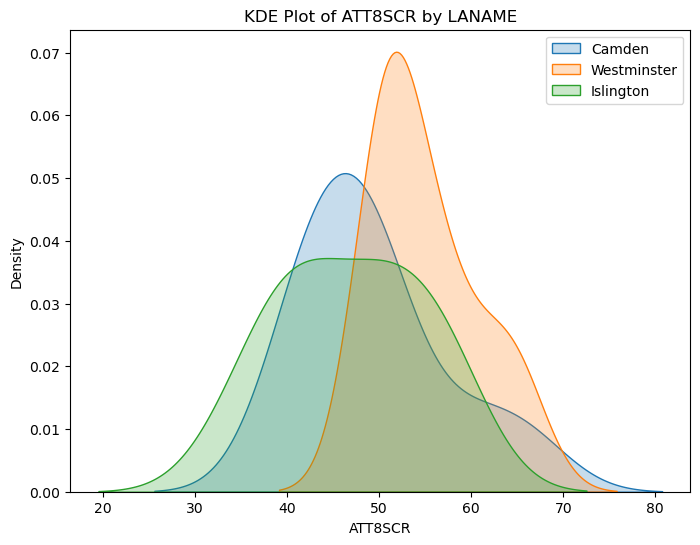

In [19]:
# Filter dataframe
df_filtered = df_school_reduced[df_school_reduced['LANAME'].isin(['Camden', 'Westminster', 'Islington'])]

# KDE plot for each group
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_filtered[df_filtered['LANAME'] == 'Camden']['ATT8SCR'], label='Camden', fill=True)
sns.kdeplot(data=df_filtered[df_filtered['LANAME'] == 'Westminster']['ATT8SCR'], label='Westminster', fill=True)
sns.kdeplot(data=df_filtered[df_filtered['LANAME'] == 'Islington']['ATT8SCR'], label='Islington', fill=True)
plt.title('KDE Plot of ATT8SCR by LANAME')
plt.xlabel('ATT8SCR')
plt.ylabel('Density')
plt.legend()
plt.show()

The KDE plots of ATT8SCR for Camden, Westminster, and Islington overlap
considerably, which indicates similar score distributions.

We will use ANOVA to formally test if they are different.

ANOVA Table:
                 sum_sq    df         F    PR(>F)
C(LANAME)   335.630586   2.0  3.258313  0.054611
Residual   1339.097000  26.0       NaN       NaN 

Shapiro-Wilk test for normality:
Statistic=0.9513, p-value=0.1976
Residuals appear normally distributed.

Levene’s test for homogeneity of variances:
Statistic=0.6877, p-value=0.5117
Variances appear homogeneous.



<Figure size 600x600 with 0 Axes>

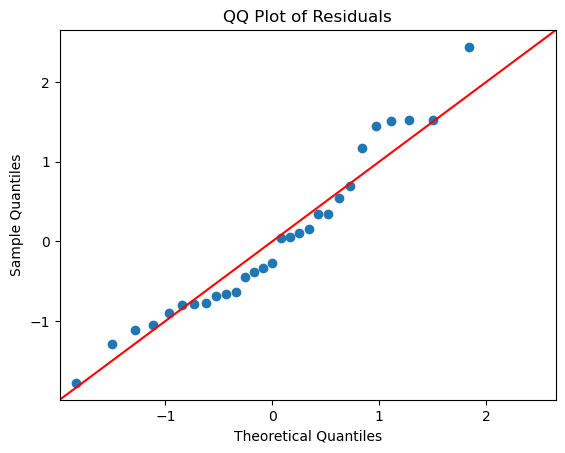

In [20]:
# ---------------------
# Fit ANOVA model
# ---------------------
model = ols('ATT8SCR ~ C(LANAME)', data=df_filtered).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:\n", anova_table, "\n")

# ---------------------
# Assumption Tests
# ---------------------
# Normality test – Shapiro-Wilk
shapiro_test = stats.shapiro(model.resid)
print("Shapiro-Wilk test for normality:")
print(f"Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("Residuals appear normally distributed.\n")
else:
    print("Residuals may not be normally distributed.\n")

# Homogeneity of variances – Levene's test
levene_test = stats.levene(
    df_filtered[df_filtered['LANAME'] == 'Camden']['ATT8SCR'],
    df_filtered[df_filtered['LANAME'] == 'Westminster']['ATT8SCR'],
    df_filtered[df_filtered['LANAME'] == 'Islington']['ATT8SCR']
)
print("Levene’s test for homogeneity of variances:")
print(f"Statistic={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")
if levene_test.pvalue > 0.05:
    print("Variances appear homogeneous.\n")
else:
    print("Variances may not be homogeneous.\n")


# Visualization
# QQ plot of residuals
plt.figure(figsize=(6, 6))
sm.qqplot(model.resid, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

-   The ANOVA tests **C(LANAME)**, which represent the difference in
    mean ATT8SCR scores between the three local authorities (Camden,
    Westminster, Islington).
-   The F statistic = 3.26 is the ratio of variance between the group
    means to the variance within the groups.
-   Degrees of Freedom
    -   Between groups: df = 2 (because there are 3 groups: df = k−1).
    -   Within groups (residual): df = 26 (total sample size minus (k-1)
        = 28 - 2).
-   p-value: PR(\>F) = 0.0546 means that under the null hypothesis (no
    difference in means), there is a 5.46% probability of obtaining an F
    statistic as large as or larger than 3.26. If we use a standard
    alpha level of 0.05, this p-value is on the margin.
-   The Shapiro-Wilk test indicates that the residuals are normally
    distributed.
-   The Levene test indicates the variances within each group are
    homogeneous.
-   The QQ plot of residuals shows that the residuals follow a normal
    distribution and there are no obvious outliers.

To visualise the distribution of F-statistic and the p-value, we can use
the following plot:

/tmp/ipykernel_5321/1743805570.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  F_stat = anova_table['F'][0]
/tmp/ipykernel_5321/1743805570.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_5321/1743805570.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_between = anova_table['df'][0]  # numerator degrees of freedom
/tmp/ipykernel_5321/1743805570.py:5: FutureWarning: Serie

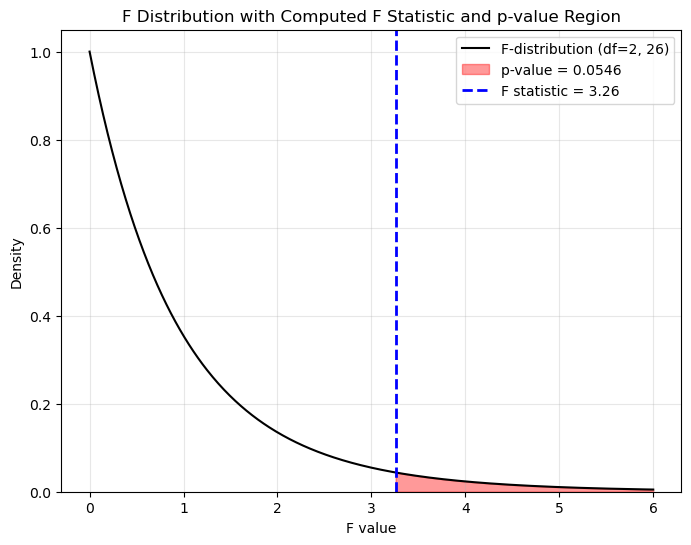

In [21]:
# Extract F statistic, p-value, and degrees of freedom from ANOVA table
F_stat = anova_table['F'][0]
p_value = anova_table['PR(>F)'][0]
df_between = anova_table['df'][0]  # numerator degrees of freedom
df_within = anova_table['df'][1]   # denominator degrees of freedom

# Create range for F distribution
x = np.linspace(0, max(6, F_stat + 2), 500)  # ensure range includes F_stat with padding
y = stats.f.pdf(x, df_between, df_within)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'k-', label=f'F-distribution (df={int(df_between)}, {int(df_within)})')

# Set y-axis minimum to 0.0
plt.ylim(bottom=0.0)

# Shade the area corresponding to the p-value (upper tail)
x_fill = np.linspace(F_stat, x.max(), 200)
y_fill = stats.f.pdf(x_fill, df_between, df_within)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.4, label=f'p-value = {p_value:.4f}')

# Mark the F statistic
plt.axvline(F_stat, color='blue', linestyle='--', linewidth=2,
            label=f'F statistic = {F_stat:.2f}')

# Labels and title
plt.title('F Distribution with Computed F Statistic and p-value Region')
plt.xlabel('F value')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## You’re Done!

Congratulations on completing the practical on correlation and ANOVA.
You’ve also learnt how to debug when an error occurs.

When you use Python (or R), it is common that a task can be completed by
different packages. For example, *Pearson correlation* can be calculated
using *scipy*, *pandas*, or *pingouin*. Choose the right tool for your
purpose, and ensure you understand the underlying principles and
limitations before using a package.

It takes time to learn - remember practice makes perfect!

If you have time, please think about applying the correlation to other
variables in the school data, or your own datasets.